# Imports

In [17]:
import os
import yake
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image
from collections import defaultdict
import sys
import spacy
from spacy.lang.fr.examples import sentences
nlp = spacy.load('fr_core_news_md')
import sys
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Pour rassembler tous les fichiers en un

In [2]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f))]

# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, 'all.txt'), 'w') as f:
    f.write(' '.join(content_list))



In [3]:
with open(os.path.join(temp_path, 'all.txt'), 'r') as f:
    after = f.read()
after

# Déterminer le champ lexical de "école" à l'aide de Word Embedding

In [1]:
import sys

from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec

import nltk
from nltk.tokenize import wordpunct_tokenize
from unidecode import unidecode
from collections import Counter

In [2]:
class MySentences(object):
    """Tokenize and Lemmatize sentences"""
    def __init__(self, filename):
        self.filename = filename

    def __iter__(self):
        for line in open(self.filename, encoding='utf-8', errors="backslashreplace"):
            yield [unidecode(w.lower()) for w in wordpunct_tokenize(line)]

In [3]:
infile = f"../data/sents.txt"
sentences = MySentences(infile)
# usage de "sents" plutot que "all" car il est nécessaire d'avoir un fichier tokenizé pour le word embedding
#sentences = [sentence for sentence in sentences] #on doit supprimer cette ligne pour ne pas surcharger la machine...pourquoi?

In [ ]:
"""bigram_phrases = Phrases(sentences)
type(bigram_phrases.vocab)
len(bigram_phrases.vocab.keys())
key_ = list(bigram_phrases.vocab.keys())[50]
print(key_)
bigram_phrases.vocab[key_]
bigram_phraser = Phraser(phrases_model=bigram_phrases)
trigram_phrases = Phrases(bigram_phraser[sentences])
trigram_phraser = Phraser(phrases_model=trigram_phrases)
corpus = list(trigram_phraser[bigram_phraser[sentences]])"""

e_j


In [4]:
bigram_phrases = Phrases(sentences)

In [5]:
type(bigram_phrases.vocab)

dict

In [6]:
len(bigram_phrases.vocab.keys())

4574835

In [7]:
key_ = list(bigram_phrases.vocab.keys())[50]

In [8]:
print(key_)

e_j


In [9]:
bigram_phrases.vocab[key_]

7292

In [10]:
bigram_phraser = Phraser(phrases_model=bigram_phrases)

In [11]:
trigram_phrases = Phrases(bigram_phraser[sentences])

In [12]:
trigram_phraser = Phraser(phrases_model=trigram_phrases)

In [13]:
corpus = list(trigram_phraser[bigram_phraser[sentences]])

In [14]:
%%time
model = Word2Vec(
    corpus, # On passe le corpus de ngrams que nous venons de créer
    vector_size=32, # Le nombre de dimensions dans lesquelles le contexte des mots devra être réduit, aka. vector_size
    window=5, # La taille du "contexte", ici 5 mots avant et après le mot observé
    min_count=5, # On ignore les mots qui n'apparaissent pas au moins 5 fois dans le corpus
    workers=4, # Permet de paralléliser l'entraînement du modèle en 4 threads
    epochs=5 # Nombre d'itérations du réseau de neurones sur le jeu de données pour ajuster les paramètres avec la descende de gradient, aka. epochs.
)
outfile = f"../data/bulletins.model"
model.save(outfile)
model = Word2Vec.load("../data/bulletins.model")
temp = model.wv.most_similar("ecole", topn=123) 
included = [pair[0] for pair in temp]
included


CPU times: user 8min 53s, sys: 9.22 s, total: 9min 2s
Wall time: 4min 13s


['ecole_primaire',
 'ecole_normale',
 'academie',
 'athenee',
 'ecole_professionnelle',
 'ecole_gardienne',
 'ecole_moyenne',
 'ecole_industrielle',
 'education',
 'ecole_normale_charles_buis',
 'ecole_menagere',
 'education_physique',
 'institut',
 'ecole_commerciale',
 'universite',
 'institut_superieur',
 'athenee_robert_catteau',
 'primaire',
 'gardienne',
 'vecole',
 'enseignement',
 'orientation',
 'enseignement_professionnel',
 'intendance',
 'enseignement_technique',
 'instruction',
 'ecole_professionnelle_couvreur',
 'industrie',
 'section_normale',
 'orphelinat',
 'athenee_leon_lepage',
 'infrastructure',
 'hopital',
 'institut_commercial',
 'ecole_professionnelle_bischoffsheim',
 'section_preparatoire',
 'ecole_couvreur',
 'atelier',
 'architecture',
 'hospice',
 'bibliotheque',
 'infirmerie',
 'ameublement',
 'organisation',
 'exposition_internationale',
 'officine',
 'ecole_polytechnique',
 'ecole_normale_emile_andre',
 'institut_technique',
 'exposition',
 'harmonie',
 'h

# Les mots à exclure de l'ensemble "most_similar" car non réellement représentatif

In [15]:
excluded = [
 'industrie',
 'vecole',
 'officine',
 'amicale',
 'gardienne',
 'hospice',
 'armee',
 'association',
 'action_sociale',
 'harmonie',
 'hopital',
 'habitation',
 'exposition_internationale',
 'animation',
 'ecoie',
 'enceinte',
 'hotel_continental',
 'artillerie',
 'agrement',
 'atmosphere',
 'alhambra',
 'hopital_saintjean',
 'antichambre',]
#23

# Keywords

In [21]:
included = ['ecole_primaire',
 'ecole_normale',
 'academie',
 'athenee',
 'ecole_professionnelle',
 'ecole_gardienne',
 'ecole_moyenne',
 'ecole_industrielle',
 'education',
 'ecole_normale_charles_buis',
 'ecole_menagere',
 'education_physique',
 'institut',
 'ecole_commerciale',
 'universite',
 'institut_superieur',
 'athenee_robert_catteau',
 'primaire',
 'gardienne',
 'vecole',
 'enseignement',
 'orientation',
 'enseignement_professionnel',
 'intendance',
 'enseignement_technique',
 'instruction',
 'ecole_professionnelle_couvreur',
 'industrie',
 'section_normale',
 'orphelinat',
 'athenee_leon_lepage',
 'infrastructure',
 'hopital',
 'institut_commercial',
 'ecole_professionnelle_bischoffsheim',
 'section_preparatoire',
 'ecole_couvreur',
 'atelier',
 'architecture',
 'hospice',
 'bibliotheque',
 'infirmerie',
 'ameublement',
 'organisation',
 'exposition_internationale',
 'officine',
 'ecole_polytechnique',
 'ecole_normale_emile_andre',
 'institut_technique',
 'exposition',
 'harmonie',
 'habitation',
 'ecole_commerciale_funck',
 'ecole_funck',
 'equipe',
 'heure_joyeuse',
 'ecole_professionnelle_funck',
 'institution',
 'histoire_naturelle',
 'enseignement_special',
 'animation',
 'integration',
 'enseignement_superieur',
 'academie_royale',
 'ecole_maternelle',
 'chaire',
 'horlogerie',
 'expansion',
 'salle',
 'horloge',
 'extension',
 'athenee_adolphe_max',
 'classe',
 'organisation_actuelle',
 'enseignement_secondaire',
 'section_commerciale',
 'infirmiere',
 'adjonction',
 'photographie',
 'ecole_normale_emile_demot',
 'escrime',
 'inspection',
 'ecole_officielle',
 'amphitheatre',
 'ecoie',
 'institut_couvreur',
 'informatique',
 'annee_preparatoire',
 'action_sociale',
 'economie_politique',
 'colonie_scolaire',
 'coiffure',
 'amicale',
 'usine',
 'orchestre',
 'agrandissement',
 'amelioration',
 'association',
 'affinage',
 'asile',
 'activite',
 'institut_bischoffsheim',
 'histoire',
 'exposition_universelle',
 'imprevoyance',
 'internat',
 'oreille',
 'instruction_religieuse',
 'hopital_saintjean',
 'expression_flamande',
 'pedagogie',
 'impulsion',
 'professionnelle',
 'etude',
 'imperieuse_necessite',
 'musique',
 'dustrie',
 'atmosphere',
 'urgente_necessite',
 'enseignement_normal',
 'enseignement_universitaire',
 'educatrices',
 'installation']

# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)

# Lister les Fichiers
data_path = "../data/txt/"
files = os.listdir(data_path)

for f in sorted(files)[:10]:
    text = open(os.path.join(data_path, f), 'r').read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        if kw.lower() in included and kw.lower() not in excluded :
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

Bxl_1847_Tome_I1_Part_1.txt mentions these keywords: ...
Bxl_1847_Tome_I1_Part_2.txt mentions these keywords: ...
Bxl_1847_Tome_I1_Part_3.txt mentions these keywords: ...
Bxl_1847_Tome_I1_Part_4.txt mentions these keywords: ...
Bxl_1847_Tome_I1_Part_5.txt mentions these keywords: ...
Bxl_1848_Tome_I1_Part_1.txt mentions these keywords: ...
Bxl_1848_Tome_I1_Part_2.txt mentions these keywords: ...
Bxl_1848_Tome_I1_Part_3.txt mentions these keywords: ...
Bxl_1849_Tome_I1_Part_1.txt mentions these keywords: ...
Bxl_1849_Tome_I1_Part_2.txt mentions these keywords: ...


# Créer le nuage de mot 

In [22]:
import nltk
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() in included and w.lower() not in excluded] 
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'
temp_path = '../data/tmp'

[('enseignement', 29609), ('classe', 19612), ('primaire', 15673), ('instruction', 14253), ('institut', 13218), ('installation', 12378), ('salle', 11521), ('organisation', 9025), ('professionnelle', 8839), ('usine', 8641), ('exposition', 8519), ('extension', 5969), ('musique', 5287), ('histoire', 4423), ('infirmerie', 4277), ('agrandissement', 4165), ('inspection', 3878), ('institution', 3232), ('architecture', 2942), ('atelier', 2853), ('orchestre', 1567), ('education', 1219), ('ameublement', 1197), ('orphelinat', 1124), ('coiffure', 1074), ('orientation', 917), ('asile', 880), ('etude', 766), ('horloge', 758), ('photographie', 615)]


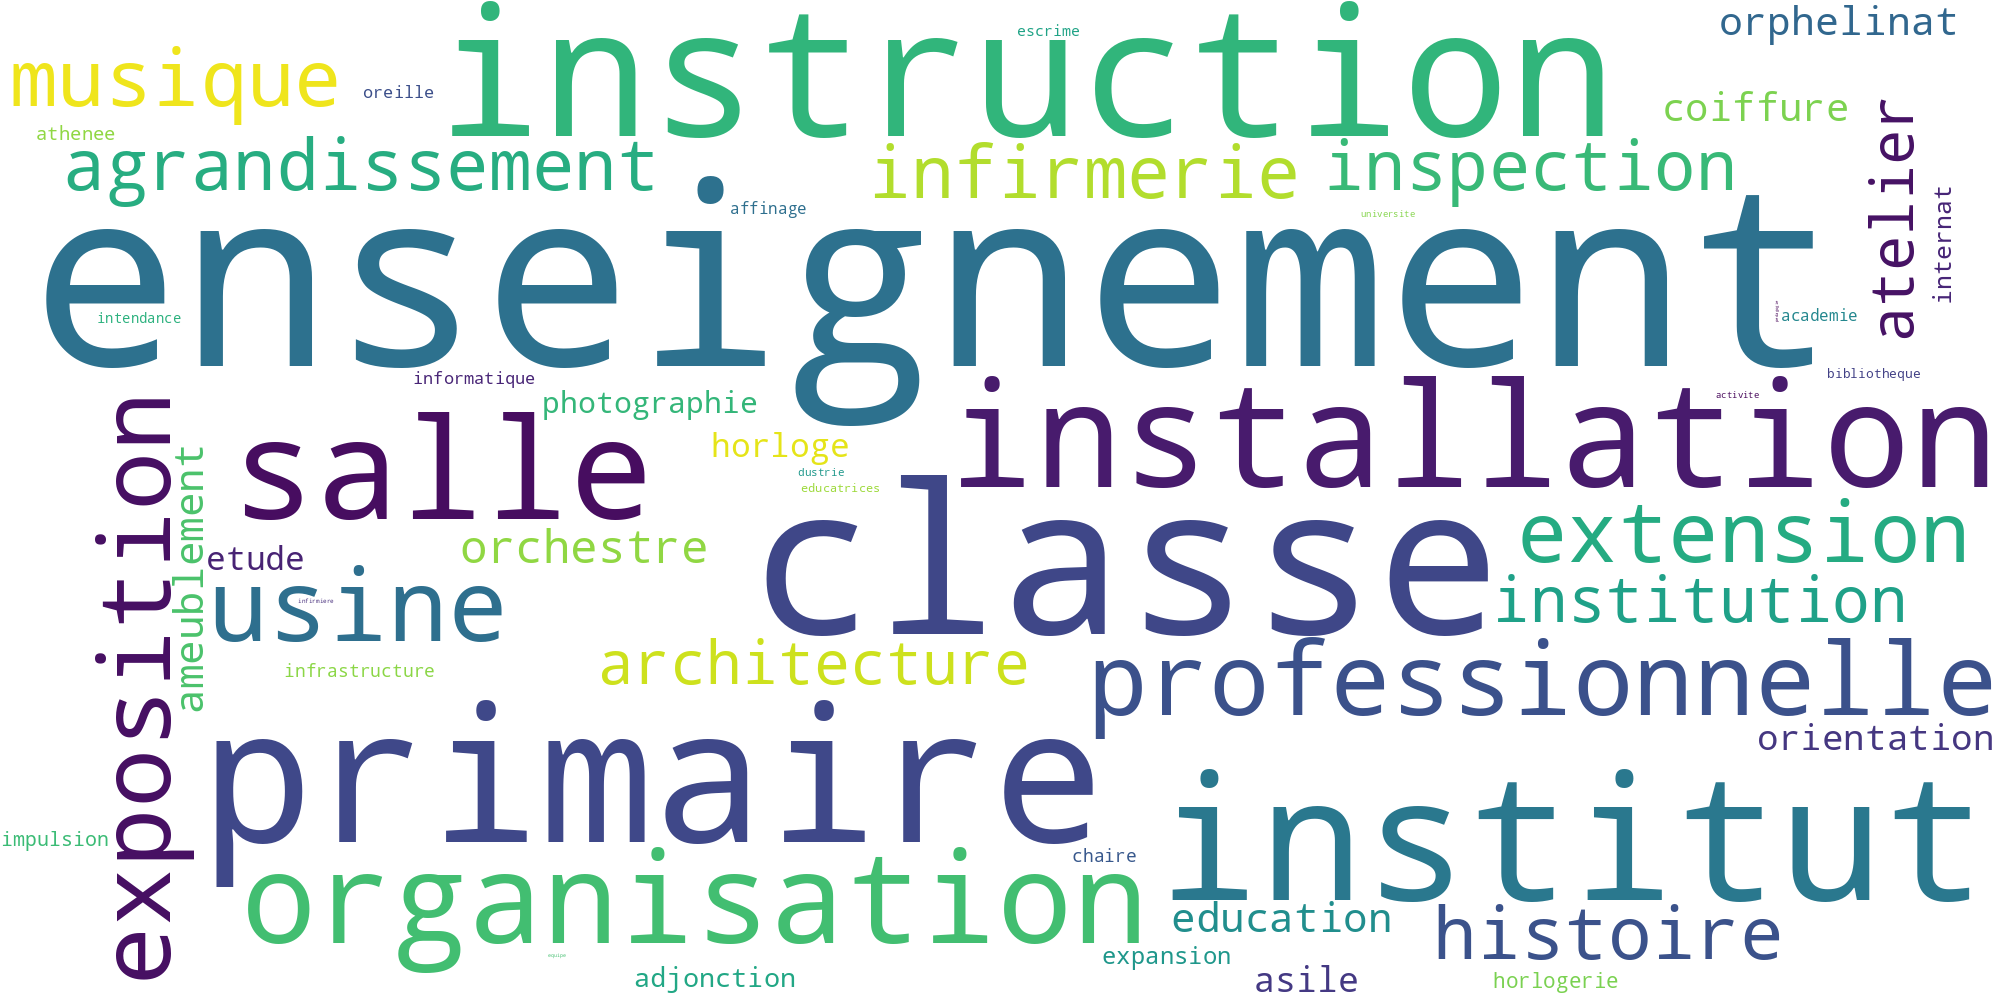

In [24]:
clean_text("all", folder=temp_path)

# Vérifier le résultat
with open(os.path.join(temp_path, 'all_clean.txt'), 'r') as f:
    after_all = f.read()
    
frequencies = Counter(after_all.split())
print(frequencies.most_common(30))

cloud_all = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud_all.to_file(os.path.join(temp_path, "all.png"))
Image(filename=os.path.join(temp_path, "all.png"))

# Montrer les années où le mot école (ou 5 de ses most_common) apparait le plus souvent

In [25]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import os

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### On crée un fichier rassemblant le contenu de tous les fichiers de chaque année 

In [ ]:
# Lister les Fichiers
data_path = "../data/txt/"
temp_path = '../data/tmp'
files = os.listdir(data_path)

for year in range(1847,1979):
    # Enlever les fichiers ne contenant pas l'année year
    temp_files = [f for f in files if str(year) in f]
    content_list = []
    for filename in sorted(temp_files)[:10]:
        with open(os.path.join(data_path, filename), 'r') as f:
            content_list.append(f.read())
    # Ecrire tout le contenu dans un fichier temporaire
    if not os.path.exists(temp_path):
        os.mkdir(temp_path)
    with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
        f.write(' '.join(content_list))

#on a la liste des fichiers des différentes années dans les fichiers data/tmp

### On va tokeniser chaque année 

In [15]:
limit = 10**8
specificlist = ('enseignement', 'classe', 'primaire', 'instruction','institut')
#Counter permet de donner la fréquence des mots relatif à l'école (mots issus de Word2Vec)

fdist = []

for year in range(1847,1979):

    # Récupération du contenu du fichier
    with open(os.path.join(temp_path, f'{year}.txt'), 'r') as f:
        text = f.read()[:limit]
    
    # Tokenization
    words = nltk.wordpunct_tokenize(text) #word = token de l'année en cours
    
    # Ne garder que les mots voulu 
    kept = [w.lower() for w in words if w.lower() in specificlist]
    voc = set(kept)
    
    #On va calculer les fréquences pour chaque année 
    fdist.append(nltk.FreqDist(kept))


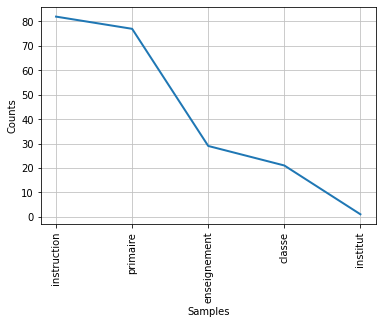

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [16]:
fdist[0].plot(10) #fréquence générée par nltk (freqdist) (fréquences de chaque mot pour une année donnée)

### Créer le plot pour chaque mot (fréquence par année)

In [30]:
import numpy
import matplotlib.pyplot as plt

freqword = [] #créé une liste de vide pour stocker les fréquences des différentes mots à travers les années
for j in range (0,len(specificlist)): #on parcourt chacun de ces mots 
    word = specificlist[j] #on va récupérer le mot J (le mot courant)
    freqword.append([0]*len(fdist)) #on crée une liste remplie de 0, avec autant de 0 qu'il y a d'année
    for i in range (0,len(fdist)): #on va parcourir les années 
        freqword[j][i] = (fdist[i][word]) #on extrait la fréquence du mot word durant l'année (i) et on la stocke dans freqword
        #on a un tableau freqword qui contient les fréquences de chaque mots pour les différentes années (années colones, mots lignes)
    x = range(1847,1979) #on va générer les années qui nous intéressent pour les mettre dans l'axe x
    pylab.title("Fréquence du mot "+ word +" à travers les années") #on définit le titre du graphe
    pylab.xlabel("année") #on définit la légende des axes
    pylab.ylabel("fréquence") #y
    a,b = numpy.polyfit(x,freqword[j],1) #on génère la pente et l'ordonnée à l'origine de la droite de régression
    y_reg = a*x+b #on génère les points qui constituent la droite de régression
    plt.plot(x,freqword[j], ".") #on affiche les fréquences du mot pour chaque année
    plt.plot(x,y_reg, "-r") #on affiche la droite de régression
    pylab.savefig(word+".png") #on sauvegarde l'image
    pylab.close() #on ferme le plot

# Recherche d'entitée nommée pour les 5 années pour les 5 mots (liés à école) les plus fréquents

In [35]:
years = []
for j in range(len(freqword)):
    temp = []
    print(specificlist[j])
    temparray = numpy.array(freqword[j]) #on convertit en array la liste des fréquences du mot enseignement pour chaque année
    for i in temparray.argsort()[-5:]: #on trie ces années par fréquence et on récupère les 5 années avec les fréquences les plus hautes
        year = i+1847
        temp.append(year)
    years.append(temp)
    print(temp)


enseignement
[1907, 1950, 1927, 1886, 1862]
classe
[1904, 1866, 1881, 1897, 1889]
primaire
[1919, 1904, 1908, 1913, 1907]
instruction
[1868, 1872, 1866, 1880, 1878]
institut
[1957, 1946, 1975, 1977, 1969]


In [36]:
for j in range(len(freqword)):
    print(specificlist[j])
    for year in years[j]:
        print(year)
        # Charger le texte
        n=900000

        text = open("../data/tmp/"+str(year)+".txt", encoding='utf-8').read()[:n] #on recupère le contenu des bulletins de l'année courante

        # Traiter le texte
        doc = nlp(text)

        # Compter les entités
        people = defaultdict(int)
        for ent in doc.ents:
            if ent.label_ == "PER" and len(ent.text) > 3:
                people[ent.text] += 1

        # Trier et imprimer
        sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

        for person, freq in sorted_people[:20]:
            print(f"{person} apparait {freq} fois dans le corpus")
        print()
    print()

enseignement
1907
Messieurs apparait 207 fois dans le corpus
Bourgmestre apparait 79 fois dans le corpus
M. le Bourgmestre apparait 69 fois dans le corpus
q u i apparait 46 fois dans le corpus
Recettes apparait 46 fois dans le corpus
Maes apparait 45 fois dans le corpus
Subside apparait 34 fois dans le corpus
q u ' i apparait 32 fois dans le corpus
Peinturage apparait 30 fois dans le corpus
Desmet apparait 27 fois dans le corpus
Budget apparait 26 fois dans le corpus
v i n L apparait 25 fois dans le corpus
Entretien apparait 22 fois dans le corpus
Vandendorpe apparait 21 fois dans le corpus
Vanneck apparait 21 fois dans le corpus
Brabandt apparait 20 fois dans le corpus
Echevin Lepage apparait 20 fois dans le corpus
ANNUITÉ DE apparait 20 fois dans le corpus
Hubert apparait 19 fois dans le corpus
q u e apparait 19 fois dans le corpus

1950
Bourgmestre apparait 151 fois dans le corpus
Messieurs apparait 148 fois dans le corpus
Brunfaut apparait 143 fois dans le corpus
Mesdames apparait 

# réentrainer un modèle sur les 5 années où les mots relatifs à l'école apparaissent

In [30]:
annees = [1862, 1866, 1881, 1886, 1907, 1908]

In [32]:
# Lister les Fichiers
content_list = []
temp_path = '../data/tmp'

for year in annees: #on parcourt les années qui nous intéressent
    with open(os.path.join(temp_path, f'{year}.txt'), 'r') as f: #on récupère le contenu du fichier de chaque année
        content_list.append(f.read())
# Ecrire tout le contenu dans un fichier temporaire
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, 'ecole.txt'), 'w') as f:
    f.write(' '.join(content_list)) #on a la liste des fichiers des différentes années dans les fichiers data/tmp

In [33]:
class MySentences(object):
    """Tokenize and Lemmatize sentences"""
    def __init__(self, filename):
        self.filename = filename

    def __iter__(self):
        for line in open(self.filename, encoding='utf-8', errors="backslashreplace"):
            yield [unidecode(w.lower()) for w in wordpunct_tokenize(line)]

In [37]:
infile = f"../data/tmp/ecole.txt"
sentences = MySentences(infile)
# usage de "sents" plutot que "all" car il est nécessaire d'avoir un fichier tokenizé pour le word embedding
#sentences = [sentence for sentence in sentences] #on doit supprimer cette ligne pour ne pas surcharger la machine...pourquoi?
bigram_phrases = Phrases(sentences)
type(bigram_phrases.vocab)
len(bigram_phrases.vocab.keys())
key_ = list(bigram_phrases.vocab.keys())[50]
print(key_)
bigram_phrases.vocab[key_]
bigram_phraser = Phraser(phrases_model=bigram_phrases)
trigram_phrases = Phrases(bigram_phraser[sentences])
trigram_phraser = Phraser(phrases_model=trigram_phrases)
corpus = list(trigram_phraser[bigram_phraser[sentences]])

b_o


In [131]:
%%time
model = Word2Vec(
    corpus, # On passe le corpus de ngrams que nous venons de créer
    vector_size=64, # Le nombre de dimensions dans lesquelles le contexte des mots devra être réduit, aka. vector_size
    window=10, # La taille du "contexte", ici 5 mots avant et après le mot observé
    min_count=10, # On ignore les mots qui n'apparaissent pas au moins 5 fois dans le corpus
    workers=4, # Permet de paralléliser l'entraînement du modèle en 4 threads
    epochs=5 # Nombre d'itérations du réseau de neurones sur le jeu de données pour ajuster les paramètres avec la descende de gradient, aka. epochs.
)
outfile = f"../data/bulletins.model"
model.save(outfile)
model = Word2Vec.load("../data/bulletins.model")


CPU times: user 12.8 s, sys: 228 ms, total: 13 s
Wall time: 5.9 s


In [132]:
temp = model.wv.most_similar("ecole", topn=123) 

In [133]:
temp

[('ecole_primaire', 0.7275712490081787),
 ('agrandissement', 0.6800855994224548),
 ('exposition', 0.6786736845970154),
 ('academie', 0.6678374409675598),
 ('association', 0.6537922620773315),
 ('enseignement', 0.6516221165657043),
 ('industrie', 0.6478883624076843),
 ('hopital', 0.6407978534698486),
 ('organisation', 0.6386774778366089),
 ('ecole_moyenne', 0.6382920742034912),
 ('impasse', 0.6351770758628845),
 ('amelioration', 0.6320648193359375),
 ('universite', 0.6316415071487427),
 ('ecole_professionnelle', 0.6296001672744751),
 ('histoire', 0.6135619878768921),
 ('instruction', 0.6096563935279846),
 ('etablissement', 0.6082425117492676),
 ('usine', 0.6055392026901245),
 ('anatomie', 0.6030220985412598),
 ('ecole_normale', 0.6012279391288757),
 ('installation', 0.6000339388847351),
 ('infirmerie', 0.592198371887207),
 ('creation', 0.590164065361023),
 ('achevement', 0.5883899331092834),
 ('institution', 0.5858601927757263),
 ('expropriation', 0.5850216150283813),
 ('extension', 0.5

In [98]:
sansc = [pair[0] for pair in temp]
sansc #pour afffihcer la liste avec juste les mots (sans les scores)

['ecole_primaire',
 'hopital',
 'installation',
 'academie',
 'institution',
 'agrandissement',
 'amelioration',
 'usine',
 'association',
 'histoire',
 'ecole_moyenne',
 'enseignement',
 'exposition',
 'ecole_normale',
 'organisation',
 'dedoublement',
 'instruction',
 'infirmerie',
 'ouverture',
 'admission',
 'electricite',
 'expropriation',
 'universite',
 'anatomie',
 'allemand',
 'architecture',
 'peinture',
 'etude',
 'industrie',
 'institut',
 'sculpture',
 'agglomeration',
 'eclairage',
 'erection',
 'inscription',
 'elargissement',
 'extension',
 'entree',
 'abri',
 'achevement',
 'etablissement',
 'acquisition',
 'ecole_professionnelle',
 'enfant',
 'intersection',
 'echelle',
 'creation',
 'horloge',
 'hospice',
 'amenagement',
 'usine_exterieure',
 'institutrice',
 'habitation',
 'impasse',
 'abattoir',
 'ecole_industrielle',
 'occasion',
 'salle',
 'avenue_louise',
 'adjonction',
 'athenee',
 'expiration',
 'angle',
 'ancien',
 'construction',
 'usine_frigorifique',
 'imm

In [87]:
included = ['ecole_primaire',
 'academie',
 'ecole_moyenne',
 'institution',
 'enseignement',
 'organisation',
 'universite',
 'hopital',
 'histoire',
 'instruction',
 'ecole_normale',
 'ecole_primaire_superieure',
 'ecole_professionnelle',
 'athenee',
 'ecole_industrielle']

# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)

# Lister les Fichiers
data_path = "../data/txt/"
files = os.listdir(data_path)

for f in sorted(files)[:10]:
    text = open(os.path.join(data_path, f), 'r').read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        if kw.lower() in included and kw.lower() not in excluded :
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

Bxl_1847_Tome_I1_Part_1.txt mentions these keywords: ...
Bxl_1847_Tome_I1_Part_2.txt mentions these keywords: ...
Bxl_1847_Tome_I1_Part_3.txt mentions these keywords: ...
Bxl_1847_Tome_I1_Part_4.txt mentions these keywords: ...
Bxl_1847_Tome_I1_Part_5.txt mentions these keywords: ...
Bxl_1848_Tome_I1_Part_1.txt mentions these keywords: ...
Bxl_1848_Tome_I1_Part_2.txt mentions these keywords: ...
Bxl_1848_Tome_I1_Part_3.txt mentions these keywords: ...
Bxl_1849_Tome_I1_Part_1.txt mentions these keywords: ...
Bxl_1849_Tome_I1_Part_2.txt mentions these keywords: ...


In [88]:
import nltk
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() in included and w.lower() not in excluded] 
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'
temp_path = '../data/tmp'

[('enseignement', 29609), ('instruction', 14253), ('organisation', 9025), ('histoire', 4423), ('institution', 3232), ('athenee', 210), ('academie', 124), ('universite', 33)]


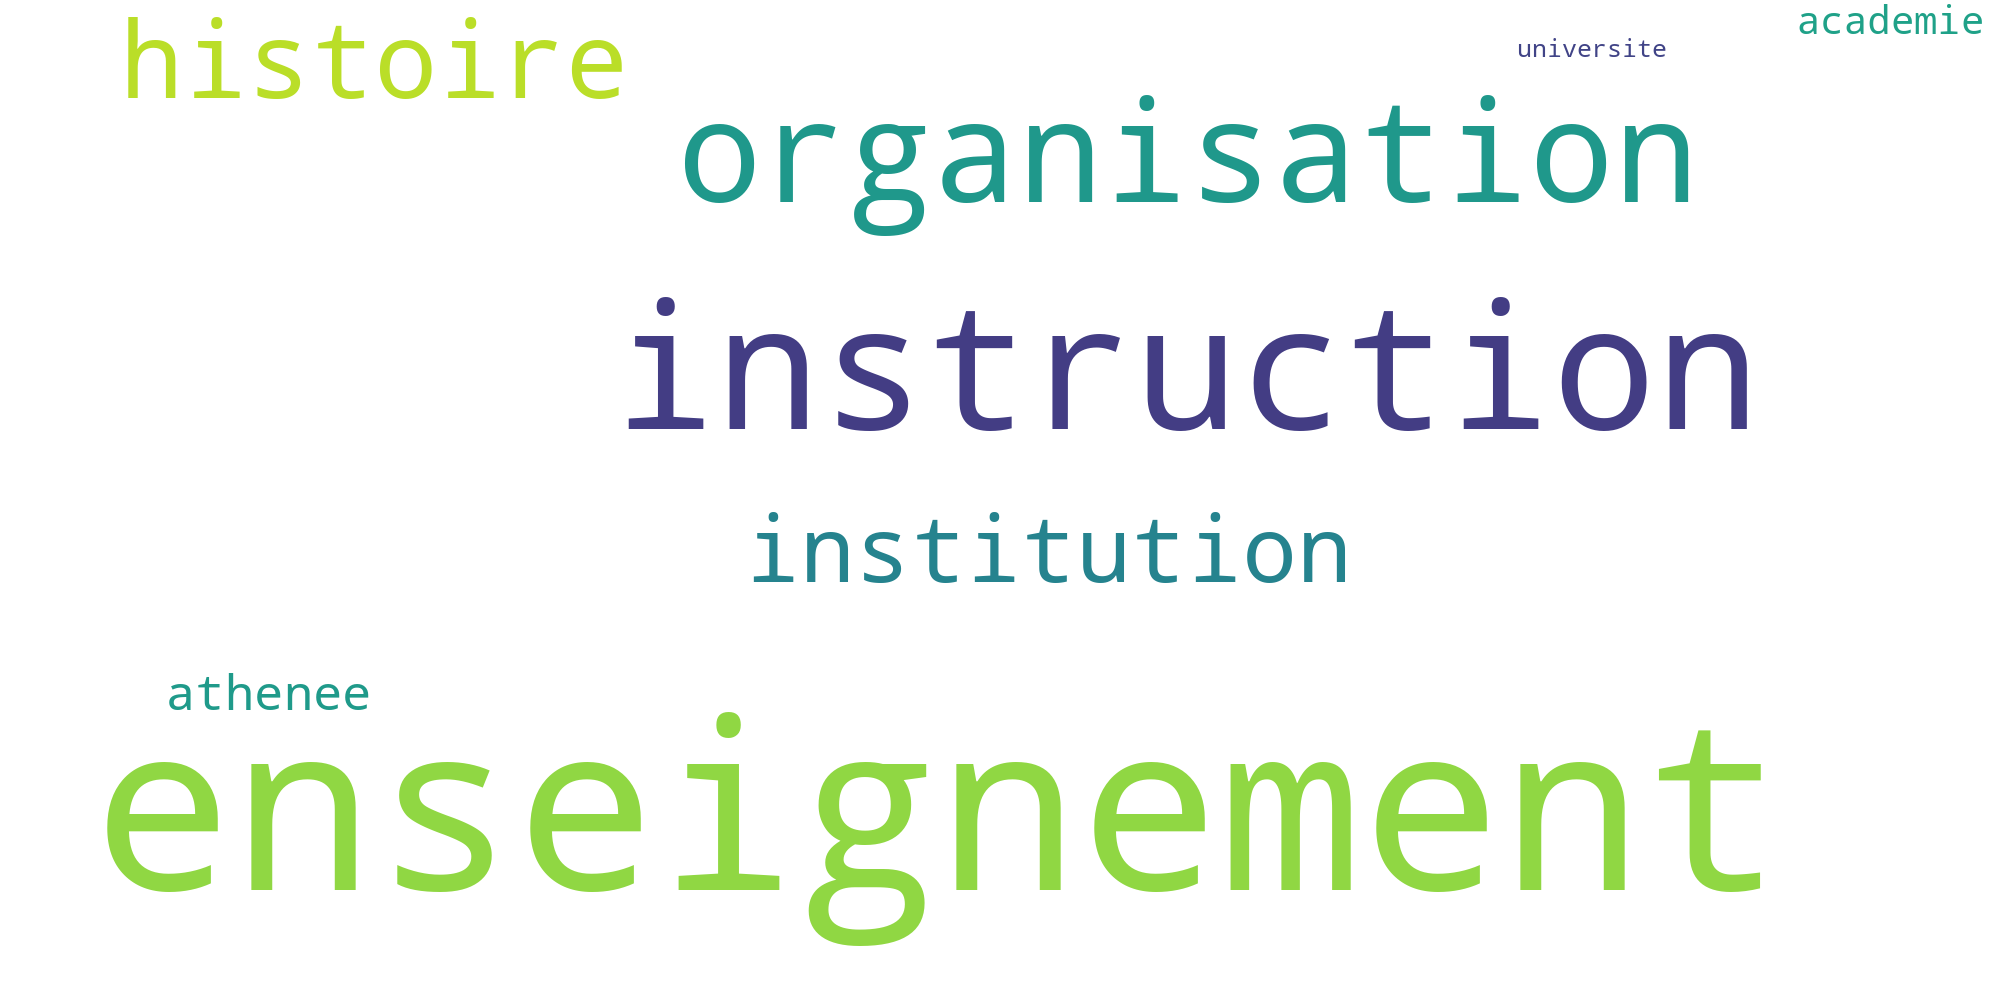

In [89]:
clean_text("all", folder=temp_path)

# Vérifier le résultat
with open(os.path.join(temp_path, 'all_clean.txt'), 'r') as f:
    after_all = f.read()
    
frequencies = Counter(after_all.split())
print(frequencies.most_common(30))

cloud_all = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud_all.to_file(os.path.join(temp_path, "all.png"))
Image(filename=os.path.join(temp_path, "all.png"))

In [72]:
temp

[('ecole_primaire', 0.7755338549613953),
 ('hopital', 0.757193922996521),
 ('association', 0.7452061176300049),
 ('ecole_moyenne', 0.7350360751152039),
 ('institutrice', 0.7059286832809448),
 ('infirmerie', 0.6853060126304626),
 ('installation', 0.675418496131897),
 ('allemand', 0.6737078428268433),
 ('industrie', 0.6677809357643127),
 ('academie', 0.6614354252815247),
 ('exposition', 0.6591140627861023),
 ('usine', 0.655826985836029),
 ('organisation', 0.6551666855812073),
 ('enseignement', 0.6506617665290833),
 ('ecole_professionnelle', 0.6451548933982849),
 ('amelioration', 0.6422396898269653),
 ('histoire', 0.6377427577972412),
 ('etablissement', 0.6255143284797668),
 ('peinture', 0.6233821511268616),
 ('erection', 0.620137095451355),
 ('agrandissement', 0.6182162165641785),
 ('ecole_normale', 0.6172597408294678),
 ('impasse', 0.6145687699317932),
 ('instruction', 0.6127632856369019),
 ('abri', 0.6091586947441101),
 ('institution', 0.6038427948951721),
 ('creation', 0.6002395153045

In [ ]:
"""
'hopital', 'installation',
 'acquisition',
 'exposition',
 'association',
     'creation',
 'ouverture',
 'usine',
 'avenue',
'amelioration',
 'alignement',
 'construction',
 'elargissement',
 'entree',
'expropriation',
 'infirmerie',
    'achevement',
    'entreprise',
'agrandissement',
'impasse',
'angle',
'eau',
'industrie',
'ixelles',
'adjudication',
'achat',
'peinture',
'insuffisance',
'espece',
'ministration_communale',
 'exploitation',
'extension',
 'electricite',
 'tion',
 'abattoir',
 'hospice',
'expertise',
 'avenue_louise',
 'assainissement',
 'erection',
 'expiration',
 'opportunite',
 'obligation',
 'anvers',
 'atmosphere',
 'appropriation',
 'etendue',
 'anniversaire',
 'eclairage',
 'activite',
 'intervention',
 'indemnite',
 'influence',
'oeuvre',
 'amenagement',
 'adjudicataire',
 'embellissement',
 'propriete_sise',
 'epoque',
 'axe',
 'execution',
 'agglomeration',
 'egalite',
 'exterieur',
 'partie',
 'agriculture',
 'sculpture',
 'impossibilite',
 'affectation',
 'rente',
 'piece',
 'octroi',
 'horloge',
 'abri',
'location',
 'inondation',
 'sacristie',
 'nistration',
'maison_rue',
 'origine',
'agglomeration_bruxelloise',
 'emplacement',
 'exception',
 'escalier',
 'maison',
'abaissement',
 'existence',
 'commune',
 'entretien',
 'facade'
 """

In [53]:
print(model.wv.most_similar(positive=['ecole_primaire',
 'hopital',
 'installation',
 'acquisition',
 'exposition',
 'association',
 'ecole_moyenne',
 'creation',
 'ouverture',
 'usine',
 'avenue',
 'academie',
 'amelioration',
 'alignement',
 'construction',
 'elargissement',
 'entree',
 'ecole_professionnelle',
 'organisation',
 'expropriation',
 'infirmerie',
 'salle',
 'achevement',
 'universite',
 'entreprise',
 'histoire',
 'agrandissement',
 'impasse',
 'etablissement',
 'enseignement',
 'angle',
 'eau',
 'industrie',
 'ixelles',
 'adjudication',
 'achat',
 'inscription',
 'peinture',
 'ecole_normale',
 'insuffisance',
 'espece',
 'ministration_communale',
 'etude',
 'exploitation',
 'extension',
 'electricite',
 'institution',
 'tion',
 'abattoir',
 'alienation',
 'habitation',
 'anatomie',
 'application',
 'institutrice',
 'distribution',
 'hospice',
 'athenee',
 'emprise',
 'incorporation',
 'autorisation',
 'expertise',
 'avenue_louise',
 'assainissement',
 'instruction',
 'erection',
 'expiration',
 'opportunite',
 'obligation',
 'anvers',
 'atmosphere',
 'appropriation',
 'etendue',
 'intelligence',
 'anniversaire',
 'eclairage',
 'activite',
 'intervention',
 'indemnite',
 'influence',
 'oeuvre',
 'amenagement',
 'adjudicataire',
 'embellissement',
 'propriete_sise',
 'epoque',
 'axe',
 'execution',
 'agglomeration',
 'egalite',
 'exterieur',
 'partie',
 'agriculture',
 'sculpture',
 'impossibilite',
 'affectation',
 'rente',
 'piece',
 'octroi',
 'horloge',
 'abri',
 'classe',
 'cour',
 'location',
 'inondation',
 'sacristie',
 'nistration',
 'institut',
 'maison_rue',
 'autorite',
 'origine',
 'absence',
 'economie',
 'agglomeration_bruxelloise',
 'emplacement',
 'exception',
 'escalier',
 'maison',
 'inspection',
 'abaissement',
 'existence',
 'commune',
 'entretien',
 'facade'], negative=['hopital', 'installation',
 'acquisition',
 'exposition',
 'association',
     'creation',
 'ouverture',
 'usine',
 'avenue',
'amelioration',
 'alignement',
 'construction',
 'elargissement',
 'entree',
'expropriation',
 'infirmerie',
    'achevement',
    'entreprise',
'agrandissement',
'impasse',
'angle',
'eau',
'industrie',
'ixelles',
'adjudication',
'achat',
'peinture',
'insuffisance',
'espece',
'ministration_communale',
 'exploitation',
'extension',
 'electricite',
 'tion',
 'abattoir',
 'hospice',
'expertise',
 'avenue_louise',
 'assainissement',
 'erection',
 'expiration',
 'opportunite',
 'obligation',
 'anvers',
 'atmosphere',
 'appropriation',
 'etendue',
 'anniversaire',
 'eclairage',
 'activite',
 'intervention',
 'indemnite',
 'influence',
'oeuvre',
 'amenagement',
 'adjudicataire',
 'embellissement',
 'propriete_sise',
 'epoque',
 'axe',
 'execution',
 'agglomeration',
 'egalite',
 'exterieur',
 'partie',
 'agriculture',
 'sculpture',
 'impossibilite',
 'affectation',
 'rente',
 'piece',
 'octroi',
 'horloge',
 'abri',
'location',
 'inondation',
 'sacristie',
 'nistration',
'maison_rue',
 'origine',
'agglomeration_bruxelloise',
 'emplacement',
 'exception',
 'escalier',
 'maison',
'abaissement',
 'existence',
 'commune',
 'entretien',
 'facade']))

[('ornementation', 0.8861185908317566), ('elevation', 0.8648861646652222), ('armee', 0.8607547879219055), ('admission', 0.8509421944618225), ('annexion', 0.8494076728820801), ('attribution', 0.8493363261222839), ('ecoulement', 0.8468322157859802), ('emploi', 0.8433258533477783), ('etat_actuel', 0.8431758284568787), ('enseignement_professionnel', 0.8417599201202393)]
